In [44]:
import pandas as pd

df = pd.read_csv("data/mountains_vs_beaches_preferences.csv")

df.head()


,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [48]:
from sklearn.preprocessing import StandardScaler

df = df[:10000]

Y = df.iloc[:, -1].to_numpy()
X = df.iloc[:, :-1]
X = pd.get_dummies(X).to_numpy()

X = StandardScaler().fit_transform(X)

X.shape, Y.shape


((10000, 26), (10000,))

In [49]:
import numpy as np

num_classes = len(np.unique(Y))

num_classes

2

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((8000, 26), (2000, 26), (8000,), (2000,))

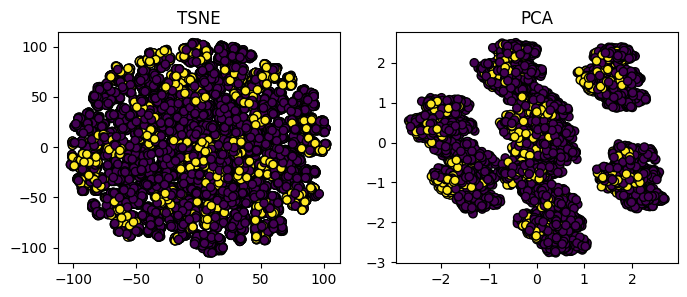

In [51]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

emb_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X=X)
emb_pca = PCA(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=Y, edgecolor='k')
axes[0].set_title("TSNE")

axes[1].scatter(emb_pca[:, 0], emb_pca[:, 1], c=Y, edgecolor='k')
axes[1].set_title("PCA")

plt.savefig(f"../assets/visuals.png", dpi=120, bbox_inches='tight')


In [53]:
from sklearn.metrics import classification_report
from knn import KNN, ParzenFixed, ParzenNonFixed, Simple

# Try different k values with Simple mode
for k in [1, 10, 30]:
    print(f"\nSimple KNN with k={k}")
    knn = KNN(k=k, mode=Simple(), num_classes=num_classes)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print(classification_report(Y_test, Y_pred))

# Try Parzen window with fixed bandwidth
for k in [3, 30]:
    for h in [0.5, 1.0, 2.0]:
        print(f"\nParzen Fixed KNN with k={k}, h={h}")
        knn = KNN(k=k, mode=ParzenFixed(h=h), num_classes=num_classes)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        print(classification_report(Y_test, Y_pred))

# Try Parzen window with adaptive bandwidth
for k in [3, 30]:
    for h in [0.5, 1.0, 2.0]:
        print(f"\nParzen Non-Fixed KNN with k={k}, h={h}")
        knn = KNN(k=k, mode=ParzenNonFixed(h=h), num_classes=num_classes)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        print(classification_report(Y_test, Y_pred))


Simple KNN with k=1
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1510
           1       0.69      0.68      0.68       490

    accuracy                           0.85      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.85      0.85      0.85      2000


Simple KNN with k=10
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1510
           1       0.87      0.65      0.74       490

    accuracy                           0.89      2000
   macro avg       0.88      0.81      0.84      2000
weighted avg       0.89      0.89      0.88      2000


Simple KNN with k=30
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1510
           1       0.91      0.67      0.77       490

    accuracy                           0.90      2000
   macro avg       0.90      0.83      0.86      2000
weighted 